<a href="https://colab.research.google.com/github/beckman9191/ECE1513-Introduction-to-Machine-Learning/blob/main/ECE1513_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
import pandas as pd
import numpy as np
df = pd.read_csv(
    filepath_or_buffer='/content/diabetes_prediction_dataset.csv',
    index_col=0
)

df=df.reset_index()
df=df.iloc[:1000]
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
995,Male,62.0,0,0,never,29.26,5.0,200,0
996,Female,44.0,0,0,No Info,46.07,5.0,145,0
997,Male,21.0,0,0,never,31.44,6.2,85,0
998,Male,45.0,0,1,current,38.25,6.1,140,0


In [ ]:
from sklearn.model_selection import train_test_split

def custom_mapping(value):
  if value=='No Info':
    return 0
  elif value=='never':
    return 1
  else:
    return 2


def load_and_split_data(df):


  df=df.fillna(0)
  y=df['diabetes']
  X=df.drop(['diabetes'], axis=1)

  X['gender']=np.where(X['gender']=='Male',1,0)
  X['smoking_history'] = X['smoking_history'].apply(custom_mapping)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
  return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = load_and_split_data(df)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Logistic Regression
#instantiate the model
log_regression = LogisticRegression(max_iter=10000)
# fit the model with data
log_regression.fit(X_train, y_train)
y_pred_log_train=log_regression.predict(X_train)
y_pred_log_test=log_regression.predict(X_test)
print("------------------Logistic Regression------------------")
print("Training accuracy for Logistic Regression:",metrics.accuracy_score(y_train, y_pred_log_train))
print("Test accuracy for Logistic Regression:",metrics.accuracy_score(y_test, y_pred_log_test))

#Support Vector Machine
clf=svm.SVC()
clf.fit(X_train, y_train)
y_pred_svc_train=clf.predict(X_train)
y_pred_svc_test=clf.predict(X_test)
print("------------------Support Vector Machine------------------")
print("Training accuracy for SVM:",metrics.accuracy_score(y_train, y_pred_svc_train))
print("Test accuracy for SVM:",metrics.accuracy_score(y_test, y_pred_svc_test))

#DecisionTreeClassfier
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt_train=dt.predict(X_train)
y_pred_dt_test=dt.predict(X_test)
print("------------------DecisionTreeClassfier------------------")
print("Training accuracy for DecisionTreeClassifier:",metrics.accuracy_score(y_train, y_pred_dt_train))
print("Test accuracy for DecisionTreeClassifier:",metrics.accuracy_score(y_test, y_pred_dt_test))

#LDA Classifier
lda=LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda_train=lda.predict(X_train)
y_pred_lda_test=lda.predict(X_test)
print("------------------LDA Classfier------------------")
print("Training accuracy for LDA Classifier:",metrics.accuracy_score(y_train, y_pred_lda_train))
print("Test accuracy for LDA Classifier:",metrics.accuracy_score(y_test, y_pred_lda_test))


------------------Logistic Regression------------------
Training accuracy for Logistic Regression: 0.9666666666666667
Test accuracy for Logistic Regression: 0.96
------------------Support Vector Machine------------------
Training accuracy for SVM: 0.9306666666666666
Test accuracy for SVM: 0.94
------------------DecisionTreeClassfier------------------
Training accuracy for DecisionTreeClassifier: 1.0
Test accuracy for DecisionTreeClassifier: 0.916
------------------LDA Classfier------------------
Training accuracy for LDA Classifier: 0.964
Test accuracy for LDA Classifier: 0.952


## Table

Model | Training Accuracy | Test Accuracy
--- | --- | ---
`Logistic Regression` | 0.9667 | 0.96
`Support Vector Machine` | 0.9306 | 0.94
`DecisionTreeClassfier` | 1.0 | 0.916
`LDA Classifier` | 0.964 | 0.952

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Create a standard scaler object
scaler=StandardScaler()
scaler.fit(X_train)

X_train_standardized=scaler.transform(X_train)
X_test_standardized=scaler.transform(X_test)


# Create a min-max scaler object for X
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)


X_train_normalized=minmax_scaler.transform(X_train)
X_test_normalized=minmax_scaler.transform(X_test)

X_train=X_train.to_numpy()
X_test=X_test.to_numpy()

# Create a min-max scaler object for Y
minmax_scaler_y = MinMaxScaler()
minmax_scaler_y.fit(y_train.to_numpy().reshape(-1, 1))
y_train_normalized=minmax_scaler_y.transform(y_train.to_numpy().reshape(-1, 1))
y_test_normalized=minmax_scaler_y.transform(y_test.to_numpy().reshape(-1, 1))


In [ ]:
import torch
import torch.nn as nn
#set parameters
input_size=X_train_normalized.shape[1]
output_size=1

class FullyConnectedNeuralNetwork(nn.Module):
  def __init__(self, input_size, layer_lst, output_size):
    super().__init__() #instantiate nn.Module

    size=len(layer_lst)
    self.input_size=input_size
    self.output_size=output_size
    self.num_hidden_layers=size
    self.layer_lst=layer_lst

    self.relu=nn.ReLU()
    self.sigmoid=nn.Sigmoid()

    #input to the first hidden layer
    self.fc_layers=nn.ModuleList([
        nn.Linear(input_size, layer_lst[0])
    ])

    #between hidden layer
    for i in range(0, size-1):
      self.fc_layers.append(nn.Linear(layer_lst[i], layer_lst[i+1]))

    #hidden to output layer
    self.fc_layers.append(nn.Linear(layer_lst[size-1], output_size))


  def forward(self, x):

    for layer in self.fc_layers[:-1]:
      x=self.relu(layer(x))

    x=self.sigmoid(self.fc_layers[-1](x))

    return x.float()


In [ ]:
from sklearn.metrics import make_scorer, f1_score, accuracy_score
def train_and_evaluate(layer_lst, X_train, y_train, X_test, y_test, num_epochs=500):
  input_size=X_train_normalized.shape[1]
  output_size=1

  X_train_tensor=torch.FloatTensor(X_train)
  X_test_tensor=torch.FloatTensor(X_test)
  y_train_tensor=torch.FloatTensor(y_train)
  y_test_tensor=torch.FloatTensor(y_test)

  #---------------building the model, set the loss function and the optimizer---------------
  #create the model
  model=FullyConnectedNeuralNetwork(input_size, layer_lst, output_size)


  #Loss function: binary cross entropy
  criterion=nn.BCELoss()

  #Adam optimizer
  optimizer=optim.Adam(model.parameters(), lr=0.001)


  #------------------------train------------------------
  for epoch in range(num_epochs):
    outputs=model(X_train_tensor)
    loss=criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



  #------------------------evaluate------------------------
  model.eval()

  with torch.no_grad():
    y_pred_train=model(X_train_tensor)
    y_pred_train=(y_pred_train>=0.5).float()
    train_accuracy=accuracy_score(y_train_normalized, y_pred_train)
    #print(accuracy)
    train_f1=f1_score(y_train_normalized, y_pred_train)
    #print(f1)



    y_pred_test=model(X_test_tensor)
    y_pred_test=(y_pred_test>=0.5).float()
    test_accuracy=accuracy_score(y_test_normalized, y_pred_test)
    #print(accuracy)
    test_f1=f1_score(y_test_normalized, y_pred_test)
    #print(f1)





  return train_accuracy, train_f1, test_accuracy, test_f1

In [ ]:
import torch.optim as optim
combinations=[
        [128],
        [64],
        [32],
        [128, 128],
        [128, 64],
        [128, 32],
        [64, 128],
        [64, 64],
        [64, 32],
        [32, 128],
        [32, 64],
        [32, 32],
        [128, 128, 128],
        [128, 128, 64],
        [128, 128, 32],
        [128, 64, 128],
        [128, 64, 64],
        [128, 64, 32],
        [128, 32, 128],
        [128, 32, 64],
        [128, 32, 32],

        [64, 128, 128],
        [64, 128, 64],
        [64, 128, 32],
        [64, 64, 128],
        [64, 64, 64],
        [64, 64, 32],
        [64, 32, 128],
        [64, 32, 64],
        [64, 32, 32],

        [32, 128, 128],
        [32, 128, 64],
        [32, 128, 32],
        [32, 64, 128],
        [32, 64, 64],
        [32, 64, 32],
        [32, 32, 128],
        [32, 32, 64],
        [32, 32, 32]
]

best_accuracy = 0
best_f1_score = 0
best_architecture = None


training_accuracies=[]
training_f1_scores=[]

testing_accuracies=[]
testing_f1_scores=[]

for comb in combinations:
  print(comb)
  training_accuracy, training_f1, test_accuracy, test_f1=train_and_evaluate(comb, X_train, y_train_normalized, X_test, y_test_normalized, 500)
  print(f"the testing accuracy for {comb} is {test_accuracy}")
  print(f"the testing f1 score for {comb} is {test_f1}")

  training_accuracies.append(training_accuracy)
  training_f1_scores.append(training_f1)

  testing_accuracies.append(test_accuracy)
  testing_f1_scores.append(test_f1)

  if testing_accuracies[-1] > best_accuracy:
      best_accuracy = testing_accuracies[-1]
      best_f1_score = testing_f1_scores[-1]
      best_architecture = comb


# Report the best architecture and its performance
print(f"Best architecture: {best_architecture}")
print(f"Best testing accuracy: {best_accuracy}")
print(f"Best testing F1 score: {best_f1_score}")

[128]
the testing accuracy for [128] is 0.932
the testing f1 score for [128] is 0.26086956521739124
[64]
the testing accuracy for [64] is 0.916
the testing f1 score for [64] is 0.08695652173913043
[32]
the testing accuracy for [32] is 0.936
the testing f1 score for [32] is 0.0
[128, 128]
the testing accuracy for [128, 128] is 0.928
the testing f1 score for [128, 128] is 0.25
[128, 64]
the testing accuracy for [128, 64] is 0.936
the testing f1 score for [128, 64] is 0.38461538461538464
[128, 32]
the testing accuracy for [128, 32] is 0.928
the testing f1 score for [128, 32] is 0.1
[64, 128]
the testing accuracy for [64, 128] is 0.928
the testing f1 score for [64, 128] is 0.25
[64, 64]
the testing accuracy for [64, 64] is 0.924
the testing f1 score for [64, 64] is 0.2962962962962963
[64, 32]
the testing accuracy for [64, 32] is 0.932
the testing f1 score for [64, 32] is 0.10526315789473684
[32, 128]
the testing accuracy for [32, 128] is 0.936
the testing f1 score for [32, 128] is 0.111111

In [ ]:
def train_and_test(best_model, input_size, X_train, y_train, X_test, y_test, num_epoch=300, lr=0.001):

  output_size=1

  X_train_tensor=torch.FloatTensor(X_train)
  X_test_tensor=torch.FloatTensor(X_test)
  y_train_tensor=torch.FloatTensor(y_train)
  y_test_tensor=torch.FloatTensor(y_test)

  training_accuracies_best=[]
  testing_accuracies_best=[]
  training_f1_best=[]
  testing_f1_best=[]
  #---------------building the model, set the loss function and the optimizer---------------
  #create the model
  model=FullyConnectedNeuralNetwork(input_size, best_model, output_size)


  #Loss function: binary cross entropy
  criterion=nn.BCELoss()

  #Adam optimizer
  optimizer=optim.Adam(model.parameters(), lr=lr)

  num_epochs = num_epoch
  for epoch in range(num_epochs):
      # Forward pass
      outputs = model(X_train_tensor)
      loss = criterion(outputs, y_train_tensor)

      # Backward pass and optimization
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if (epoch+1) % 100 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

      with torch.no_grad():
        y_pred_train=model(X_train_tensor)
        y_pred_train=(y_pred_train>=0.5).float()
        train_accuracy=accuracy_score(y_train, y_pred_train)
        training_accuracies_best.append(train_accuracy)
        train_f1=f1_score(y_train, y_pred_train)
        training_f1_best.append(train_f1)



        y_pred_test=model(X_test_tensor)
        y_pred_test=(y_pred_test>=0.5).float()
        test_accuracy=accuracy_score(y_test, y_pred_test)
        testing_accuracies_best.append(test_accuracy)
        test_f1=f1_score(y_test, y_pred_test)
        testing_f1_best.append(test_f1)


  # Plot the training and testing accuracy and F1-score
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))

  axes[0].plot(range(num_epochs), training_accuracies_best, label='training accuracies')
  axes[0].plot(range(num_epochs), testing_accuracies_best, label='testing accuracies')
  axes[0].set_xlabel('num_epochs')
  axes[0].set_ylabel('Accuracy')
  axes[0].set_title('Accuracy')
  axes[0].legend()

  axes[1].plot(range(num_epochs), training_f1_best, label='training f1 scores')
  axes[1].plot(range(num_epochs), testing_f1_best, label='testing f1 scores')
  axes[1].set_xlabel('num_epochs')
  axes[1].set_ylabel('f1 scores')
  axes[1].set_title('f1 scores')
  axes[1].legend()

  # Adjust layout
  plt.tight_layout()

  # Display the subplots
  plt.show()

  return model

Epoch [100/1000], Loss: 0.2600
Epoch [200/1000], Loss: 0.2025
Epoch [300/1000], Loss: 0.1674
Epoch [400/1000], Loss: 0.1364
Epoch [500/1000], Loss: 0.1190
Epoch [600/1000], Loss: 0.0988
Epoch [700/1000], Loss: 0.1094
Epoch [800/1000], Loss: 0.1059
Epoch [900/1000], Loss: 0.0877
Epoch [1000/1000], Loss: 0.0828


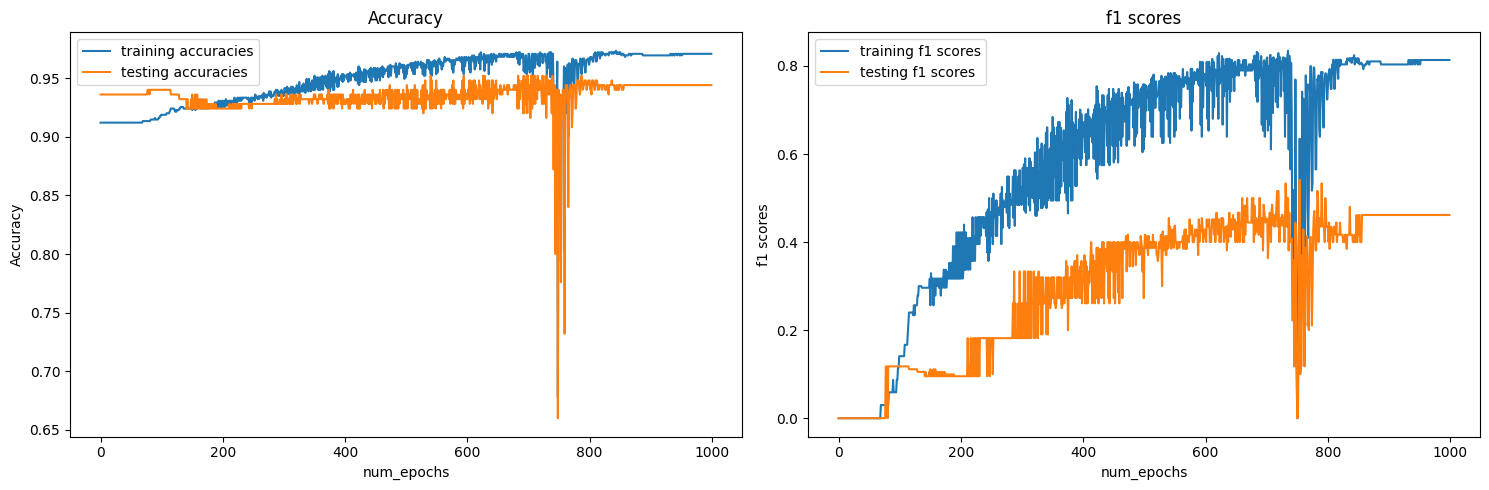

In [ ]:
my_nn=train_and_test(best_architecture, X_train_normalized.shape[1], X_train, y_train_normalized, X_test, y_test_normalized, 1000, 0.001)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
the best k is 2
the highest cross-validation accuracy is 0.9373333333333334


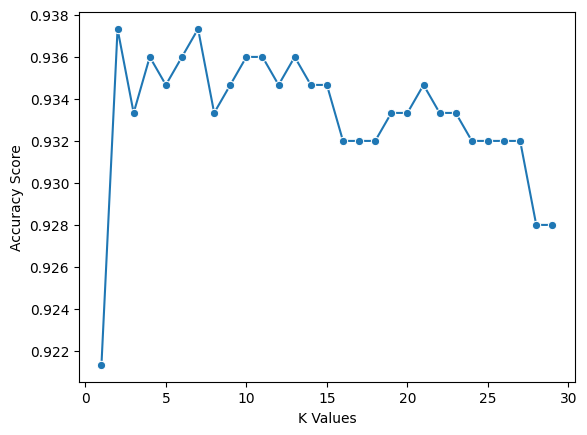

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
test_scores=[]
train_scores=[]
k_values = [i for i in range (1,30)]
for i in k_values:
  KNN=KNeighborsClassifier(n_neighbors=i)
  print(i)
  scores=cross_validate(KNN, X_train, y_train, cv=5, return_train_score=True)
  test_scores.append(scores['test_score'].mean())
  train_scores.append(scores['train_score'].mean())




sns.lineplot(x = k_values, y = test_scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

best_index = np.argmax(test_scores)
best_k = k_values[best_index]
full_feature_accuracy=test_scores[best_index]
print("the best k is " + str(best_k))
print("the highest cross-validation accuracy is " + str(full_feature_accuracy))

In [ ]:
from sklearn import tree

k_values = [i for i in range (1,30)]
col_names=df.columns.tolist()
col_names.remove('diabetes')

def Feature_selector (X_train , y_train , tr=0.95):
  dt = tree.DecisionTreeClassifier()
  lst_removed_features=[]
  k_vals_for_features=[]
  mean_cross_val_acuuracy=[]



  #step 1: Fits a decision tree classifier on the training set
  dt.fit(X_train,y_train)
  #step 1.5: Create a tmp DataFrame
  df_tmp=pd.DataFrame(data=X_train, columns=col_names)
  df_tmp=df_tmp.fillna(0)
  #print(df_tmp)
  #step 2: Extracts the feature importance order of the decision tree model
  importance = dt.feature_importances_
  #print(importance)
  sort_index = np.argsort(importance)
  print(importance)
  print(col_names)
  print(sort_index)
  #print(sort_index)
  for n in range(len(importance)-1):
  #for n in range(0, 3):
    #step 3: Removes the least important feature based on step 2
    df_tmp.pop(col_names[sort_index[n]])
    print(sort_index[n])
    #step 4:Then, a KNN model is trained on the remaining features.
    #    The number of neighbors (k) for each KNN model should be tuned using a 5-fold cross-validation.
    test_scores=[]
    for i in k_values:
      KNN=KNeighborsClassifier(n_neighbors=i)
      scores=cross_validate(KNN, df_tmp, y_train, cv=5, return_train_score=True, error_score='raise')
      test_scores.append(scores['test_score'].mean())

    best_index = np.argmax(test_scores)
    best_k = k_values[best_index]
    #step 7: stop or no
    if test_scores[best_index]>=(tr*full_feature_accuracy):
      lst_removed_features.append(col_names[sort_index[n]])
      mean_cross_val_acuuracy.append(test_scores[best_index])
      k_vals_for_features.append(best_k)
    else:
      return lst_removed_features, mean_cross_val_acuuracy, k_vals_for_features
    # we reach the very end

  return lst_removed_features, mean_cross_val_acuuracy, k_vals_for_features



res=Feature_selector(X_train, y_train)

[0.02373358 0.08495389 0.         0.01400536 0.06197554 0.10534963
 0.5267346  0.1832474 ]
['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
[2 3 0 4 1 5 7 6]
2
3
0
4
1
5
7


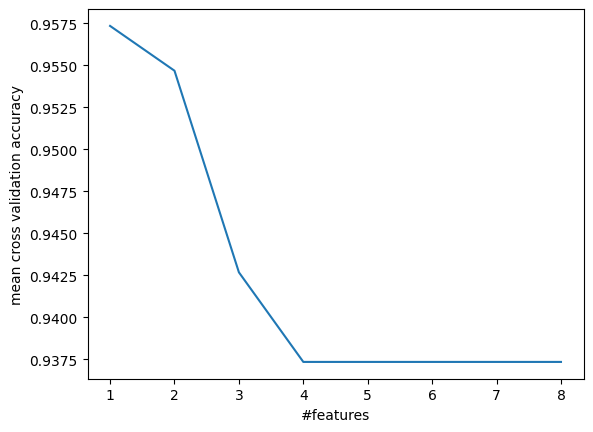

In [ ]:
num_feature=len(col_names)
mean_cross_val_acc=res[1].copy()
mean_cross_val_acc.reverse()
mean_cross_val_acc.append(full_feature_accuracy)
plt.xlabel("#features")
plt.ylabel("mean cross validation accuracy")
plt.plot(range(1, num_feature+1), mean_cross_val_acc)